# Sample 15arc-sec GEBCO_2023.nc on OM4p25 grid

## Apply edits to the topography.

## REGION= [[-30,3,-100,-60,],]

In [1]:
# Notebook editor: Brandon.Reichl

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
#The notebook says it is only to the equator, but we expanded north to 3N to fully check/modify Galapagos.
Region_Boundaries = [-30,3,-100,-60]
Region_Name = '10: Southeast tropical Pacific Ocean'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


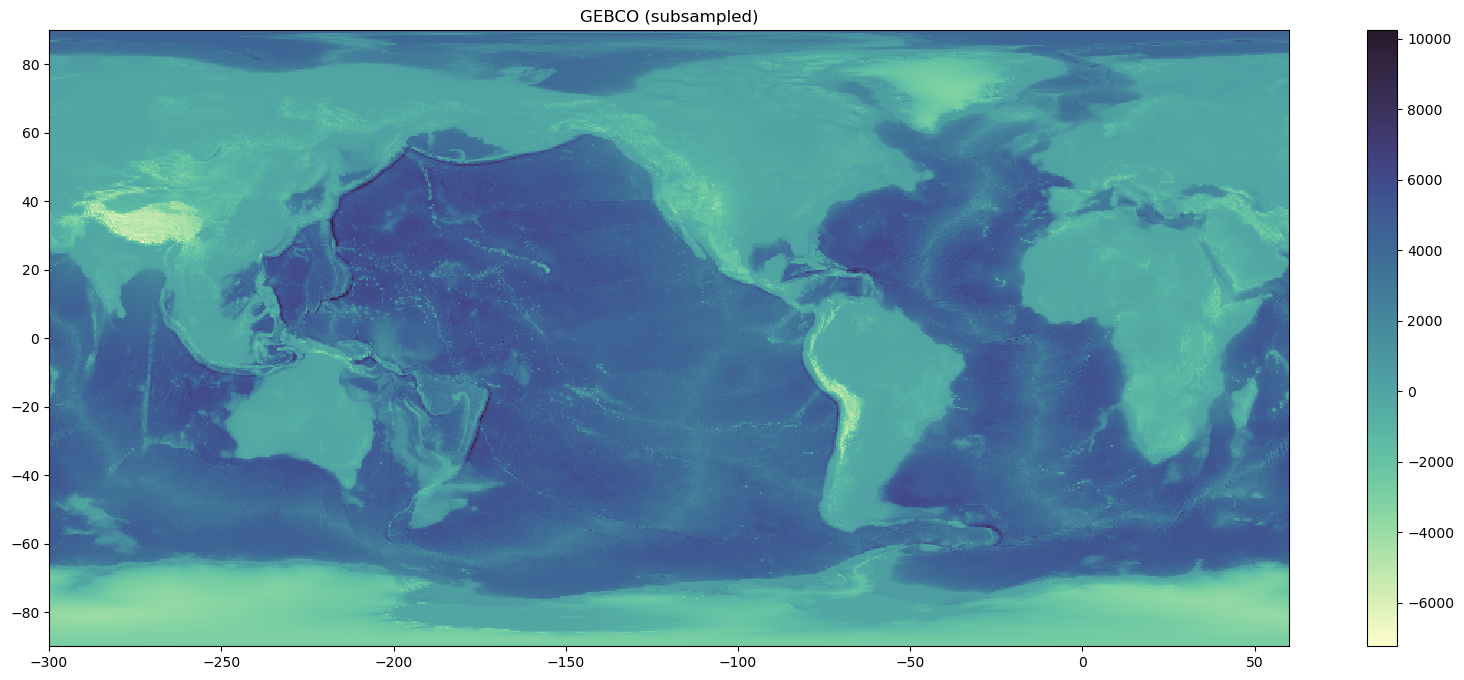

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

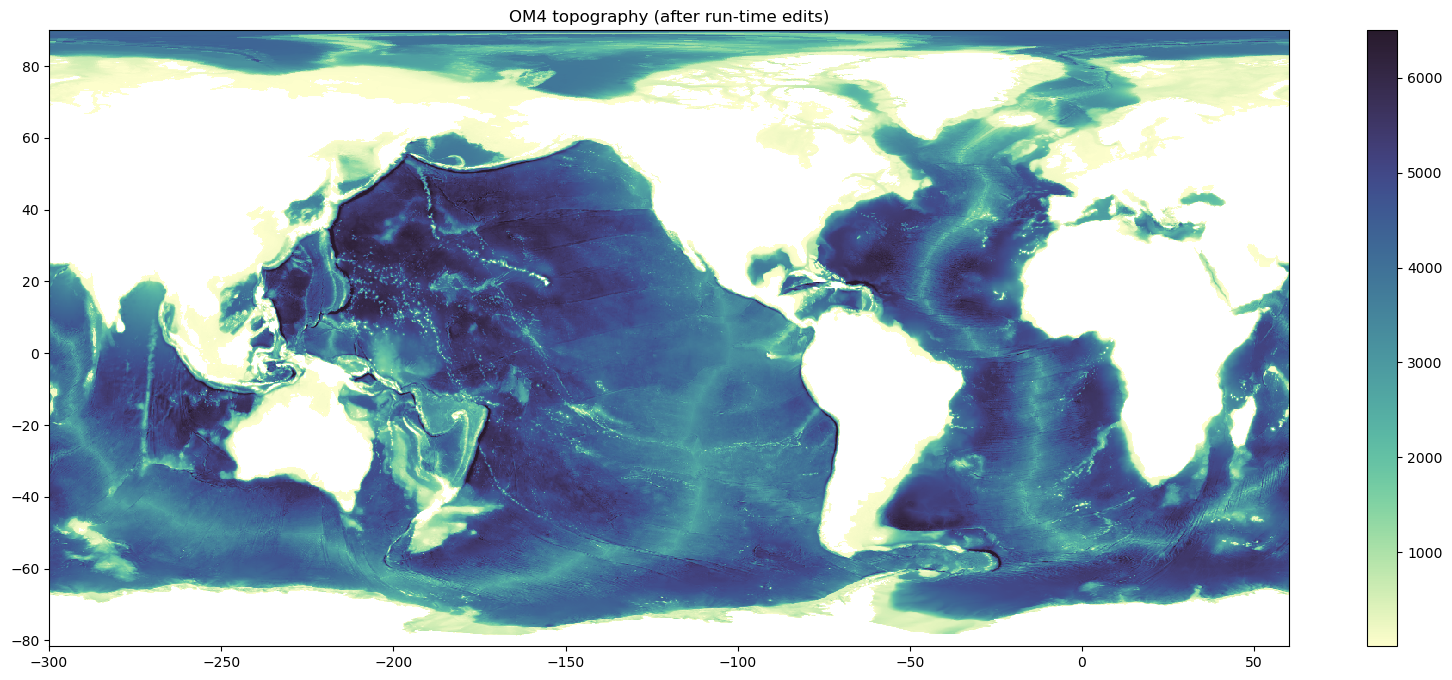

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

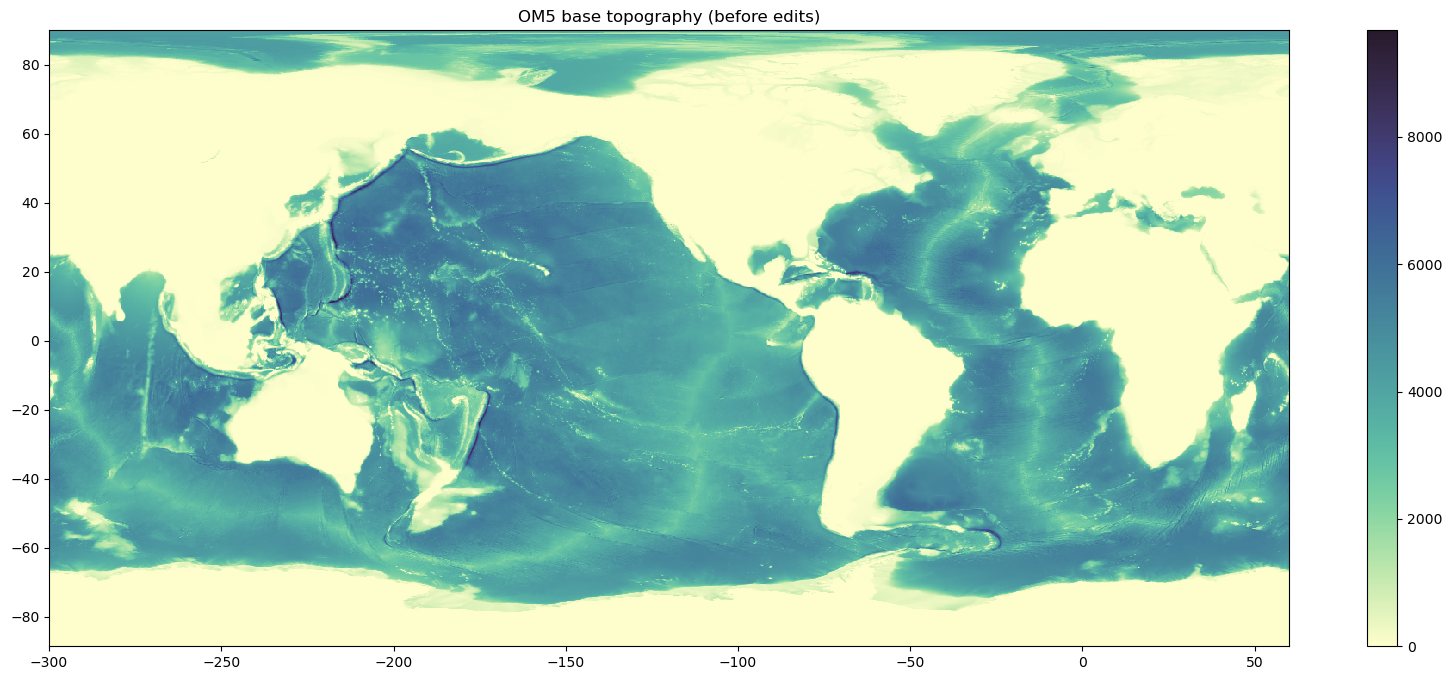

In [6]:
OM5 = OM5_data('ocean_hgrid.nc',
               'regridded_source_topog.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

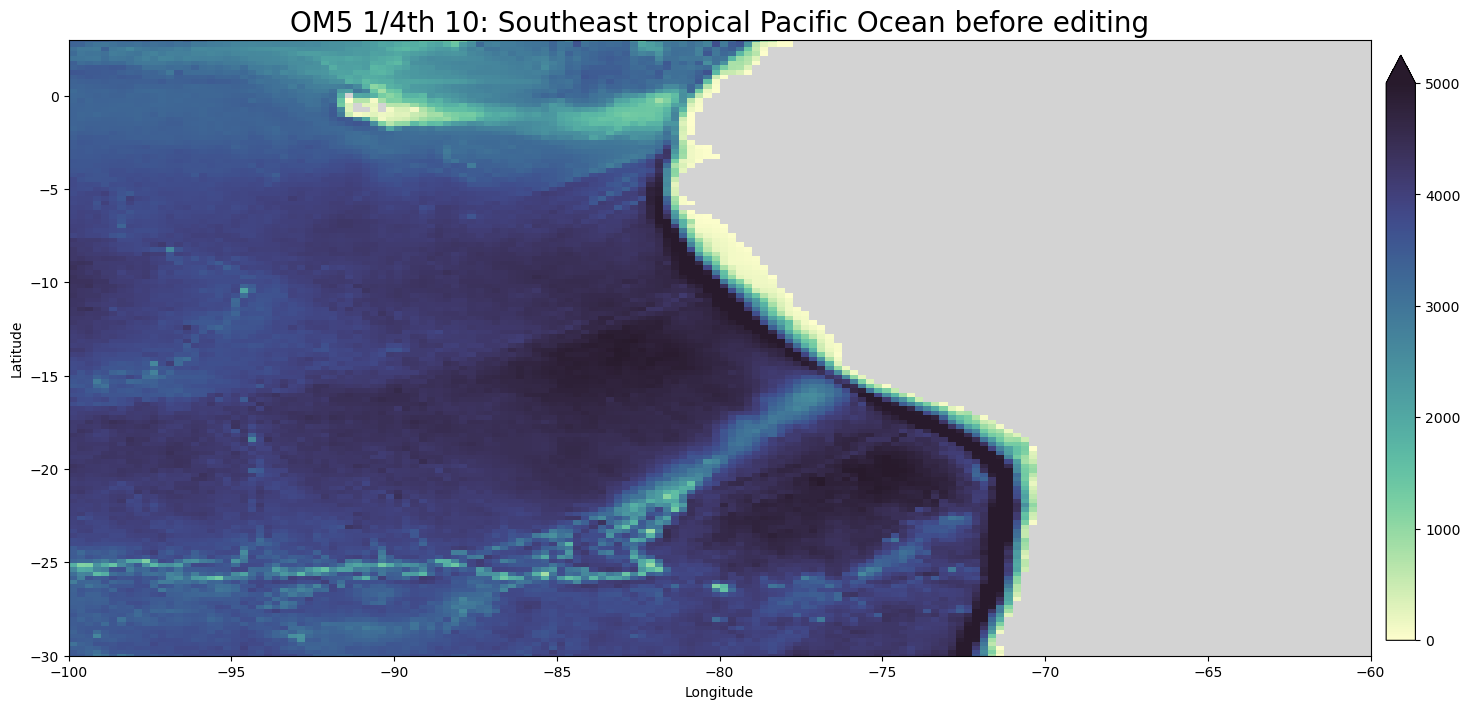

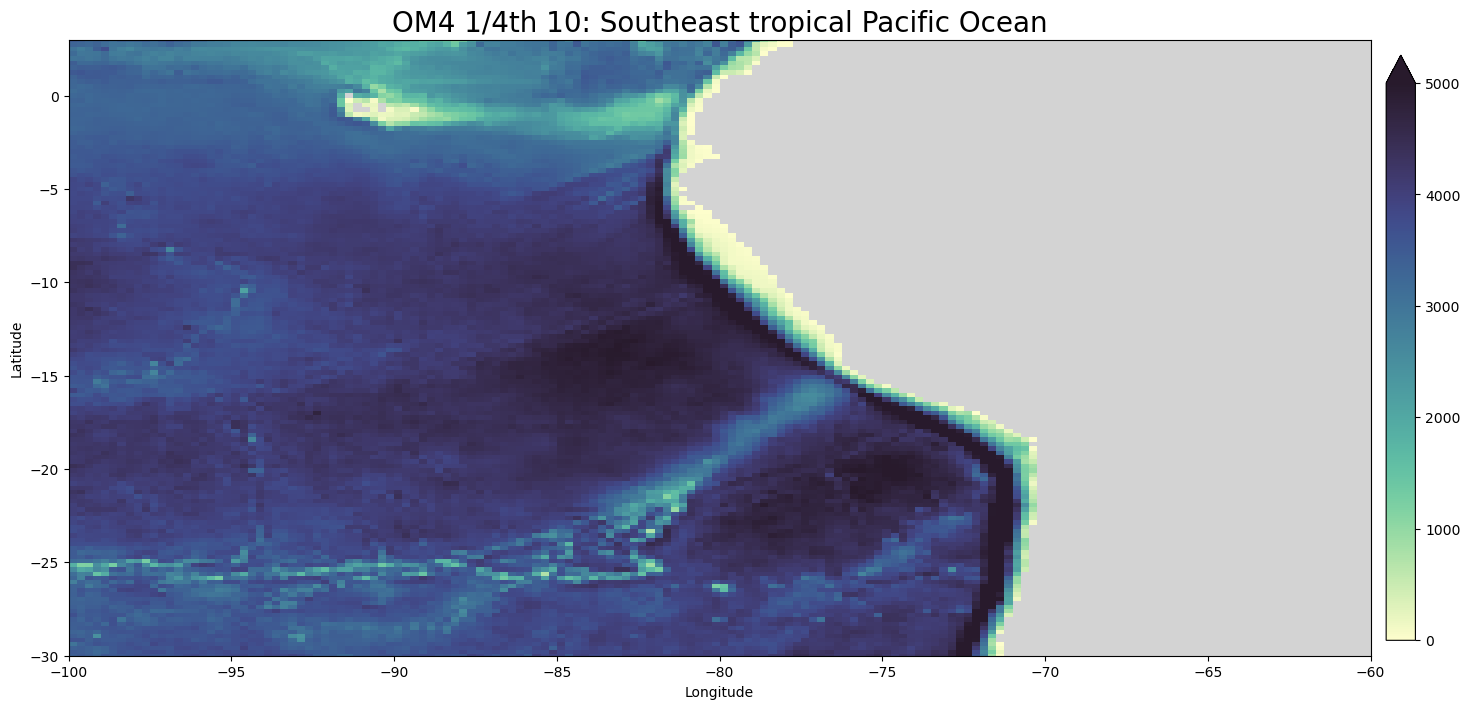

In [7]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (Region_Boundaries[2],Region_Boundaries[3]),
          (Region_Boundaries[0],Region_Boundaries[1]),
          0, 5000, Region_Name, om4=True, new=False)

Gebco (js:je,is:ie) = 14399:16799,47999:50399
OM4 model (js:je,is:ie) = 376:422,798:840
OM5 model (js:je,is:ie) = 457:503,798:840
Using xlim = (-100.0, -90.0) ylim = (-30.0, -20.0)
Gebco (js:je,is:ie) = 16799:19199,47999:50399
OM4 model (js:je,is:ie) = 420:464,798:840
OM5 model (js:je,is:ie) = 501:545,798:840
Using xlim = (-100.0, -90.0) ylim = (-20.0, -10.0)
Gebco (js:je,is:ie) = 19199:21599,47999:50399
OM4 model (js:je,is:ie) = 462:504,798:840
OM5 model (js:je,is:ie) = 543:585,798:840
Using xlim = (-100.0, -90.0) ylim = (-10.0, 0.0)


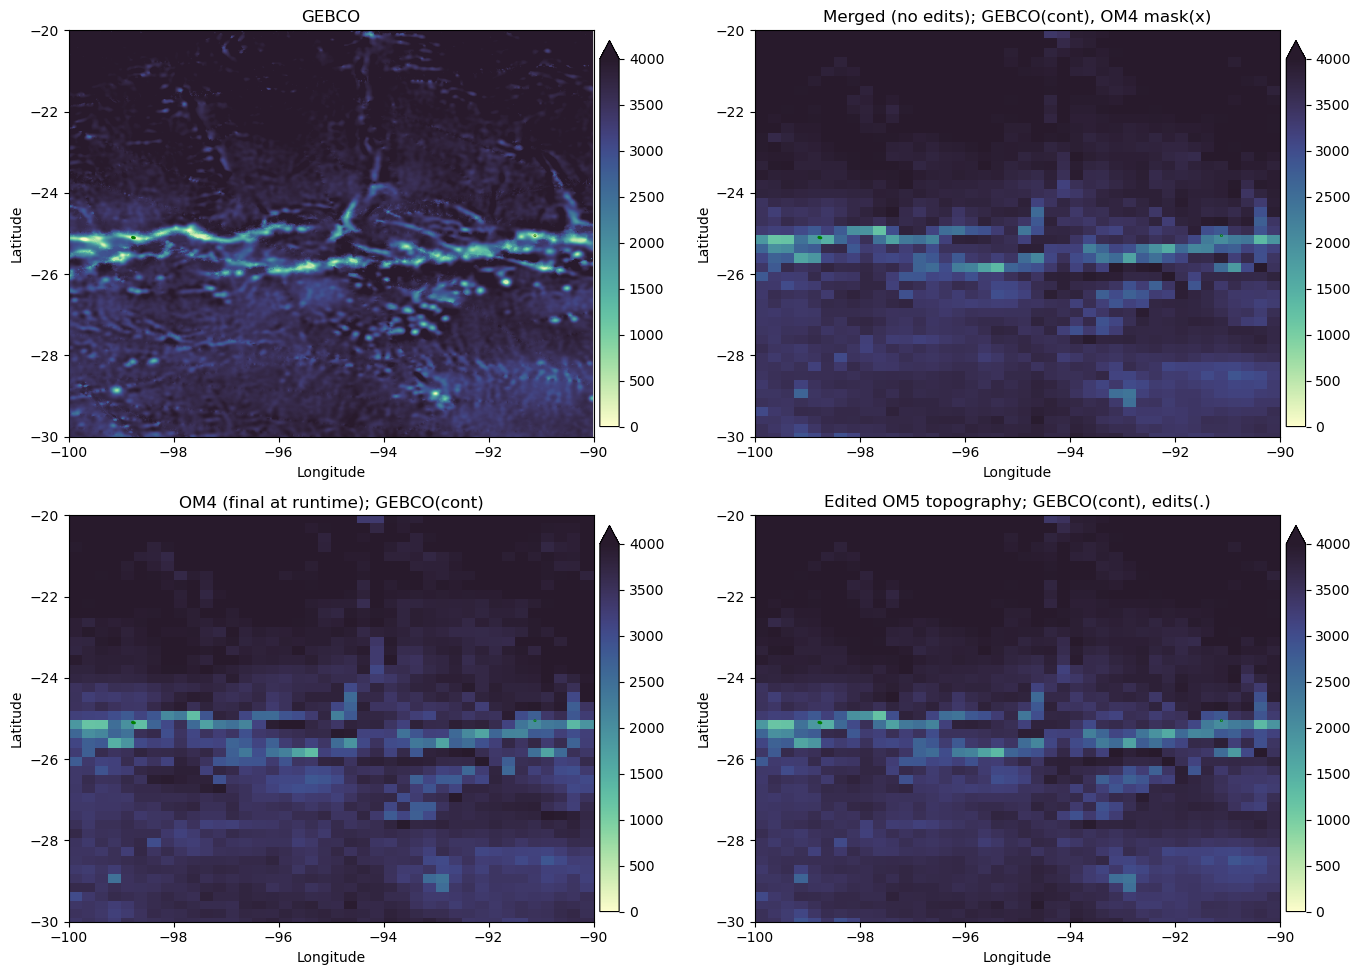

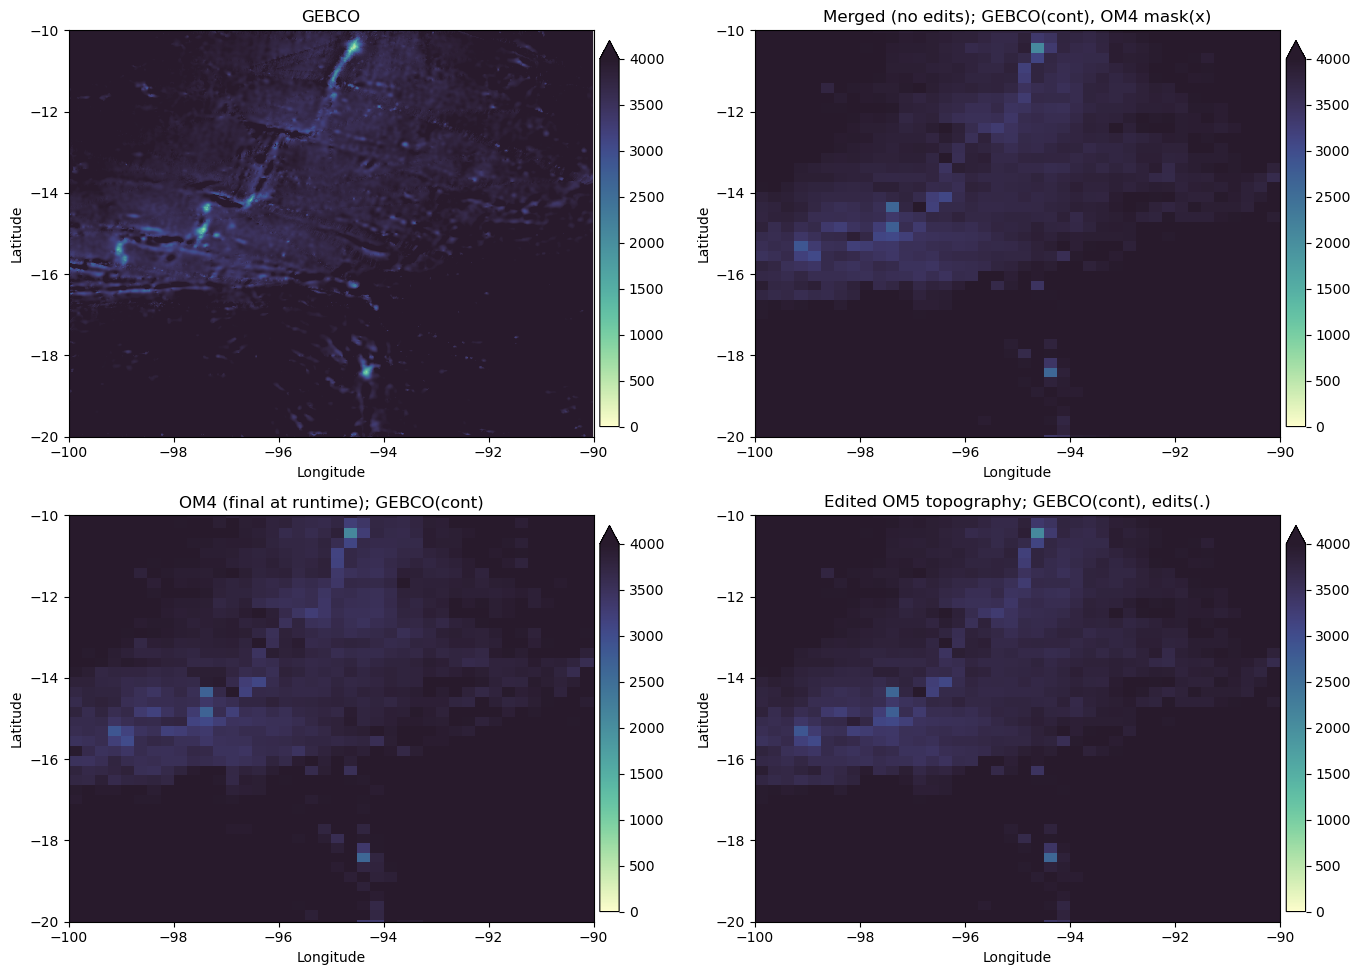

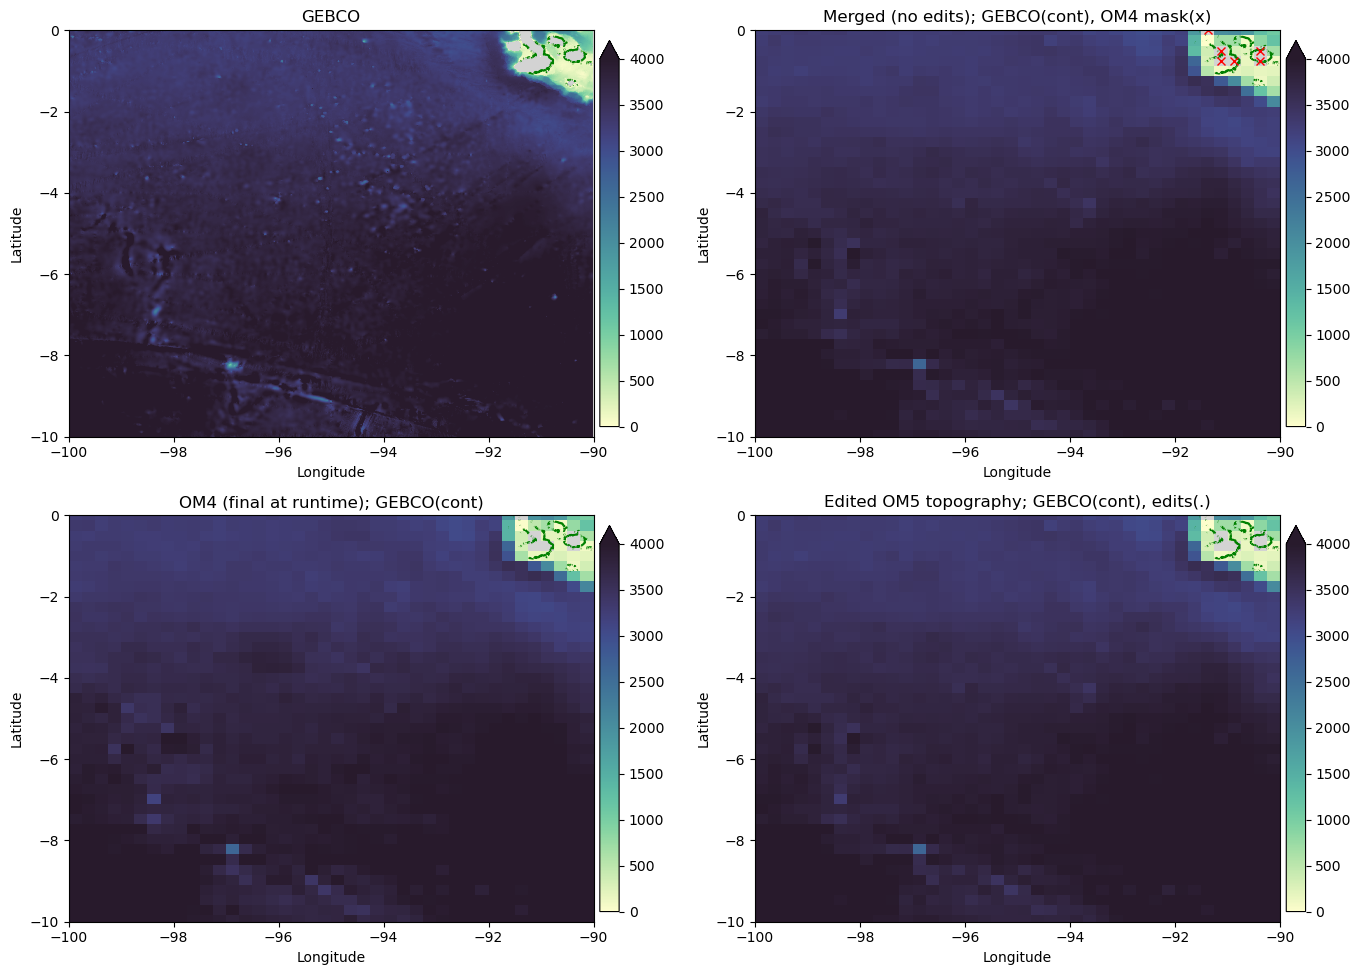

In [8]:
region = Region(-95, -25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-95, -15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-95, -5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 21239:21719,49919:50399
OM4 model (js:je,is:ie) = 496:506,830:840
OM5 model (js:je,is:ie) = 577:587,830:840
Using xlim = (-92.0, -90.0) ylim = (-1.5, 0.5)


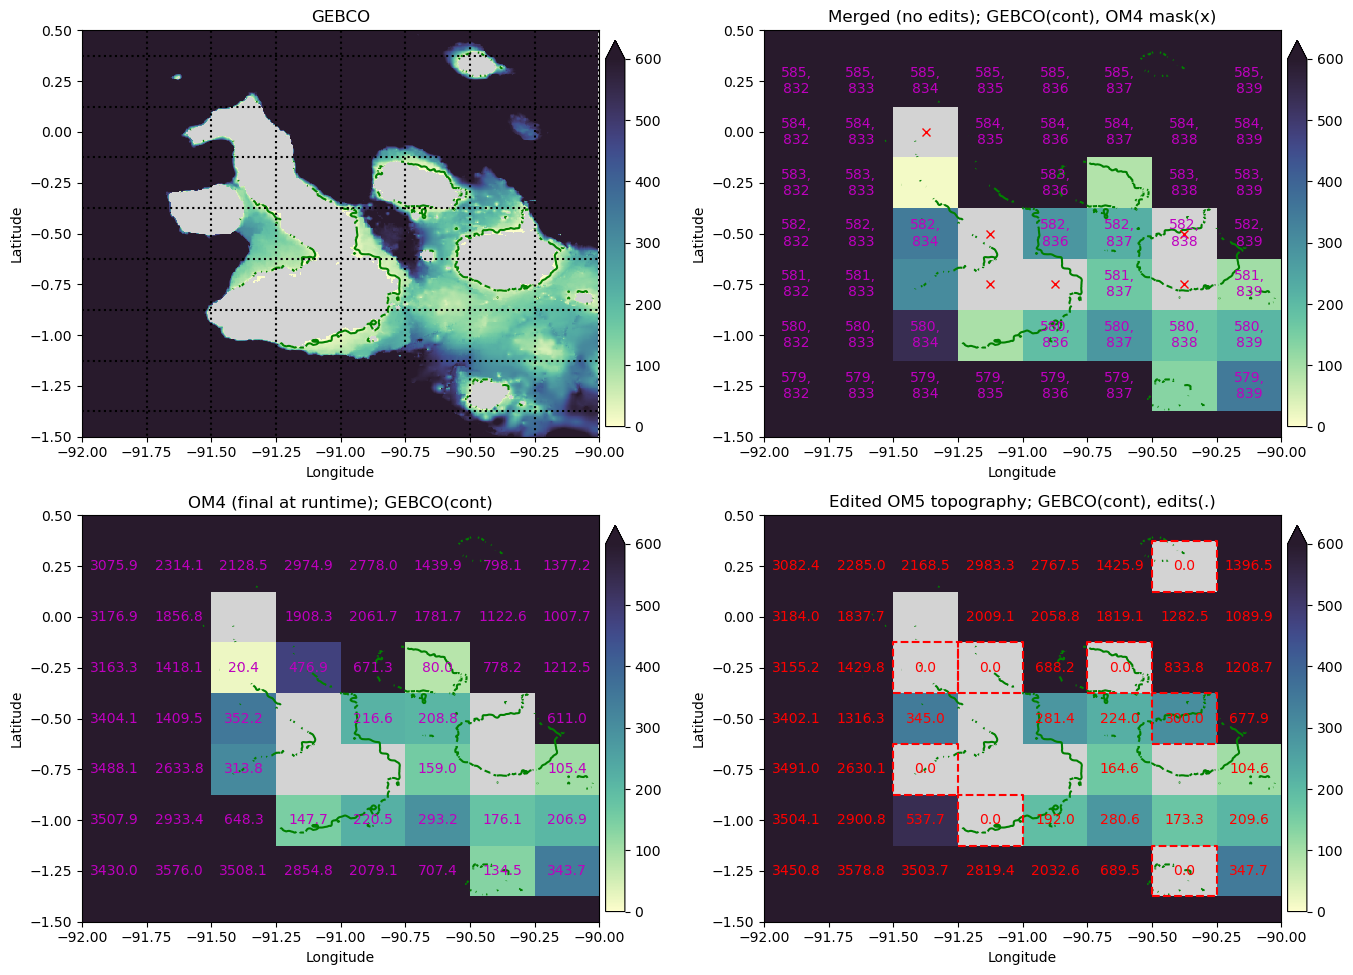

In [9]:
#OM5.reset(region)
OM5.depth[585,838]=0.0
OM5.depth[583,834]=0.0
OM5.depth[583,835]=0.0
OM5.depth[583,837]=0.0
OM5.depth[582,838]=300.0
OM5.depth[581,834]=0.0
OM5.depth[580,835]=0.0
OM5.depth[579,838]=0.0

region = Region(-91, -0.5, width_lon=2, width_lat=2)
map_region(region, 0, 600, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=True);


Gebco (js:je,is:ie) = 14399:16799,50399:52799
OM4 model (js:je,is:ie) = 376:422,838:880
OM5 model (js:je,is:ie) = 457:503,838:880
Using xlim = (-90.0, -80.0) ylim = (-30.0, -20.0)
Gebco (js:je,is:ie) = 16799:19199,50399:52799
OM4 model (js:je,is:ie) = 420:464,838:880
OM5 model (js:je,is:ie) = 501:545,838:880
Using xlim = (-90.0, -80.0) ylim = (-20.0, -10.0)
Gebco (js:je,is:ie) = 19199:21599,50399:52799
OM4 model (js:je,is:ie) = 462:504,838:880
OM5 model (js:je,is:ie) = 543:585,838:880
Using xlim = (-90.0, -80.0) ylim = (-10.0, 0.0)


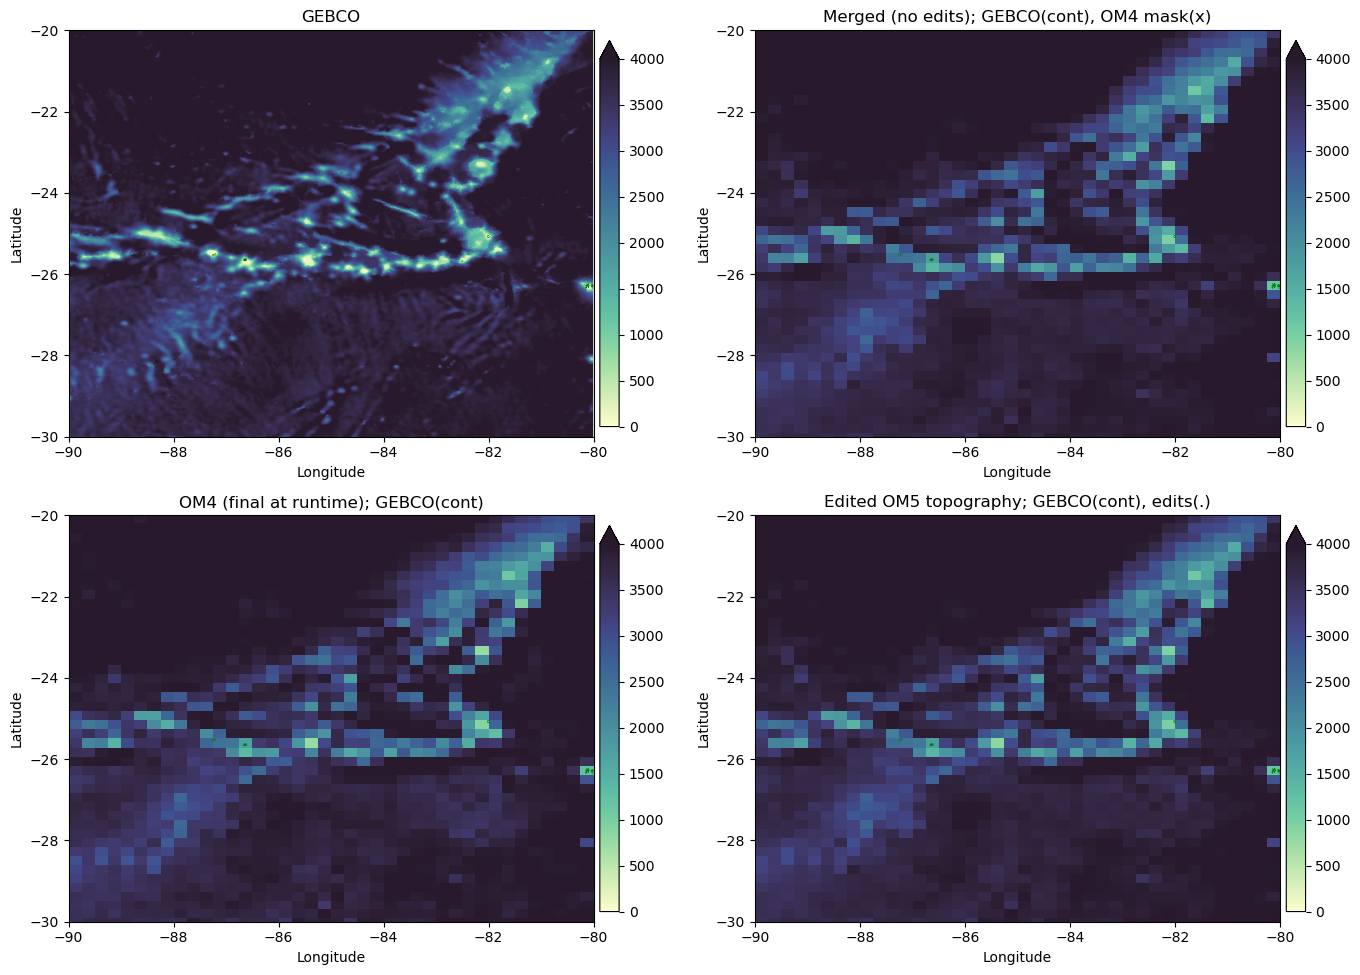

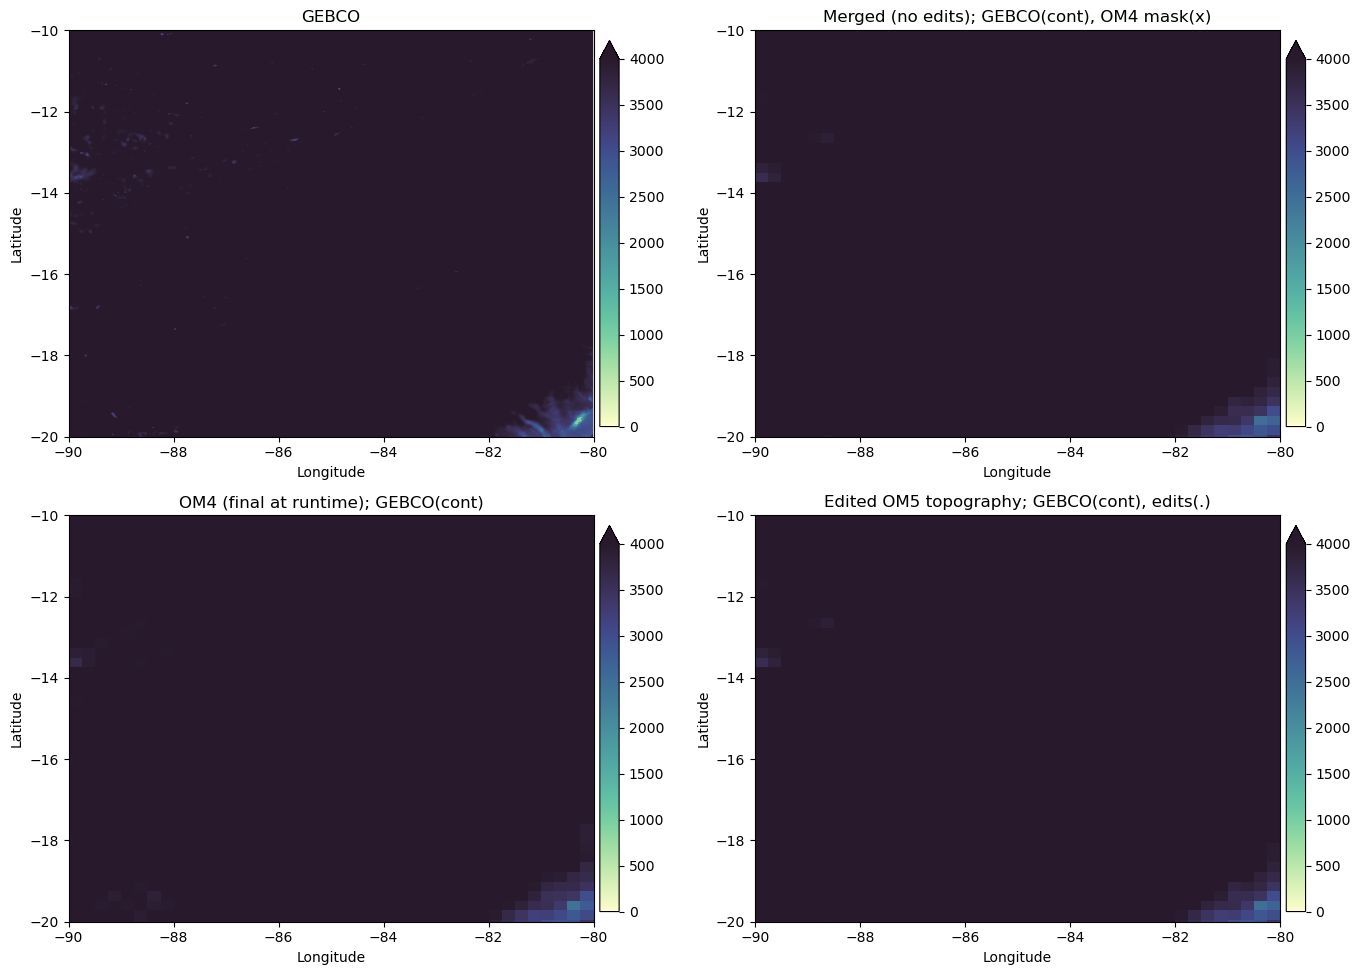

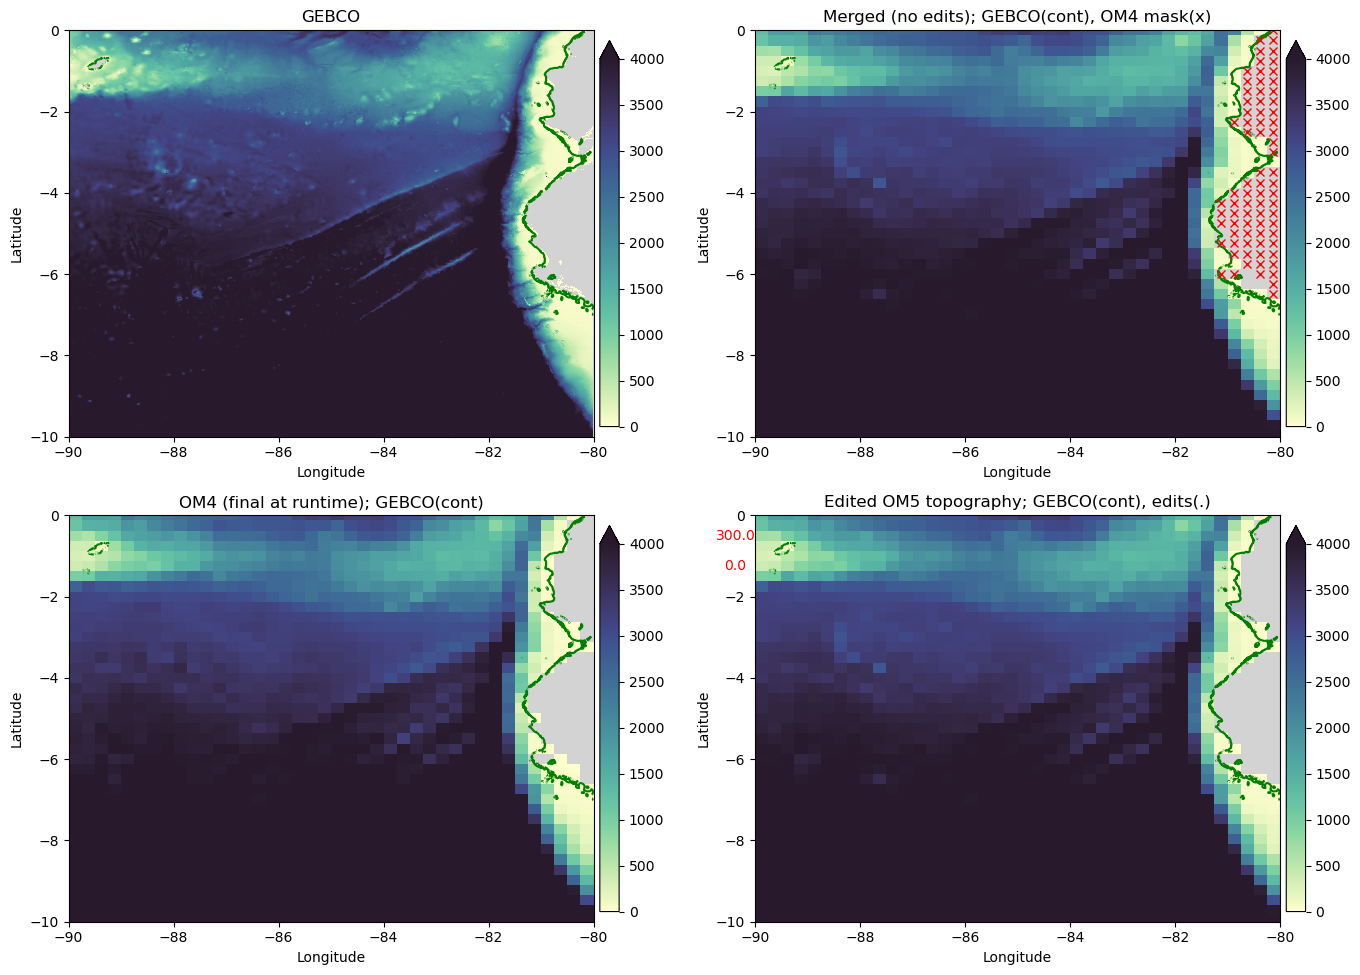

In [10]:
region = Region(-85, -25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-85, -15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-85, -5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 21239:21719,50399:50879
OM4 model (js:je,is:ie) = 496:506,838:848
OM5 model (js:je,is:ie) = 577:587,838:848
Using xlim = (-90.0, -88.0) ylim = (-1.5, 0.5)


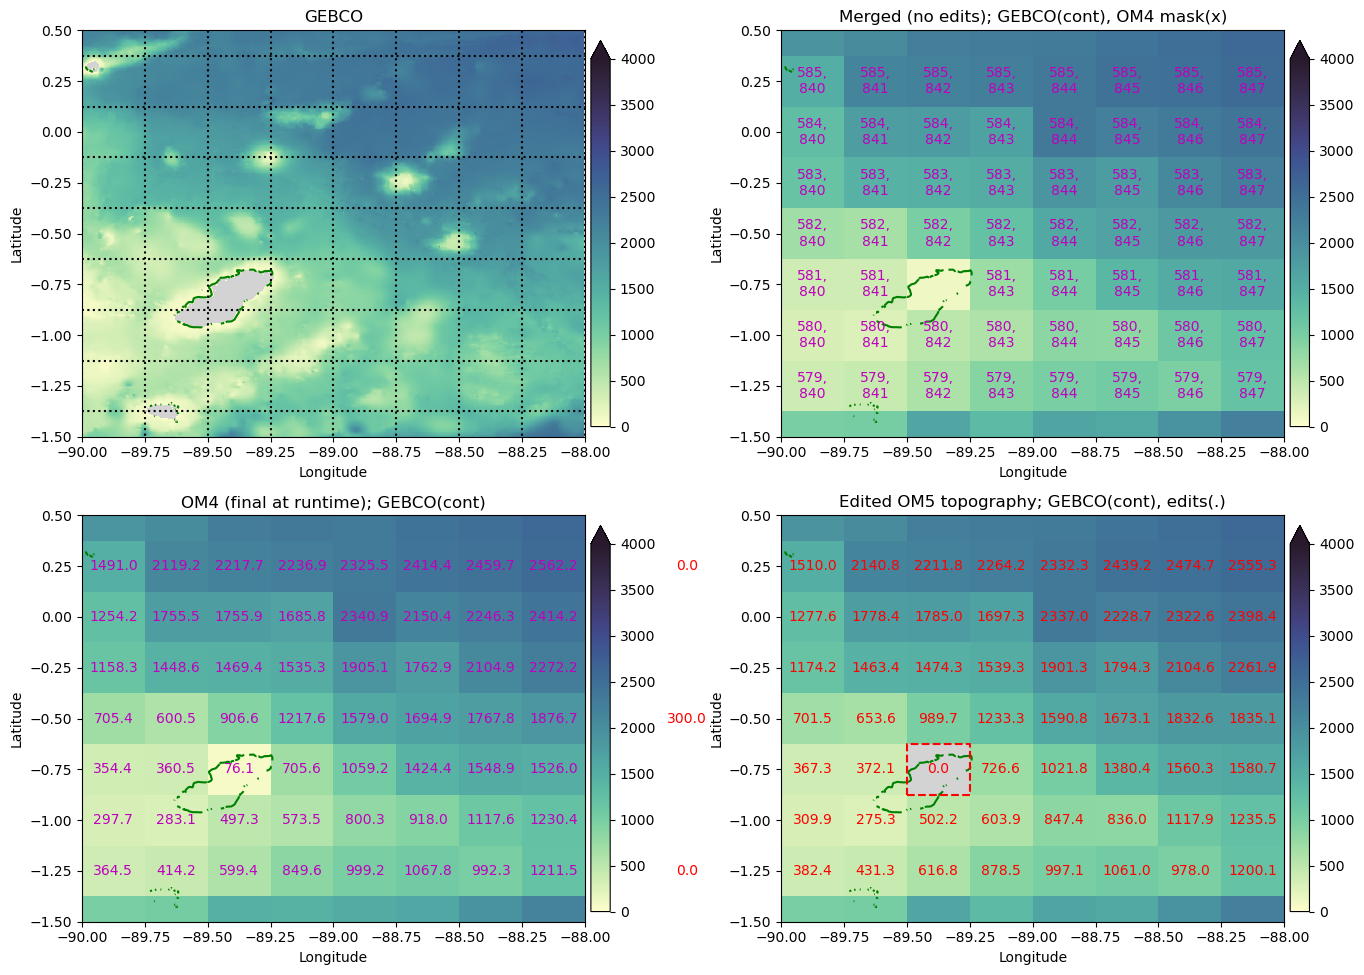

In [11]:
OM5.depth[581,842]=0.0
region = Region(-89, -0.5, width_lon=2, width_lat=2)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=True);

Gebco (js:je,is:ie) = 14399:16799,52799:55199
OM4 model (js:je,is:ie) = 376:422,878:920
OM5 model (js:je,is:ie) = 457:503,878:920
Using xlim = (-80.0, -70.0) ylim = (-30.0, -20.0)
Gebco (js:je,is:ie) = 16799:19199,52799:55199
OM4 model (js:je,is:ie) = 420:464,878:920
OM5 model (js:je,is:ie) = 501:545,878:920
Using xlim = (-80.0, -70.0) ylim = (-20.0, -10.0)
Gebco (js:je,is:ie) = 19199:21599,52799:55199
OM4 model (js:je,is:ie) = 462:504,878:920
OM5 model (js:je,is:ie) = 543:585,878:920
Using xlim = (-80.0, -70.0) ylim = (-10.0, 0.0)


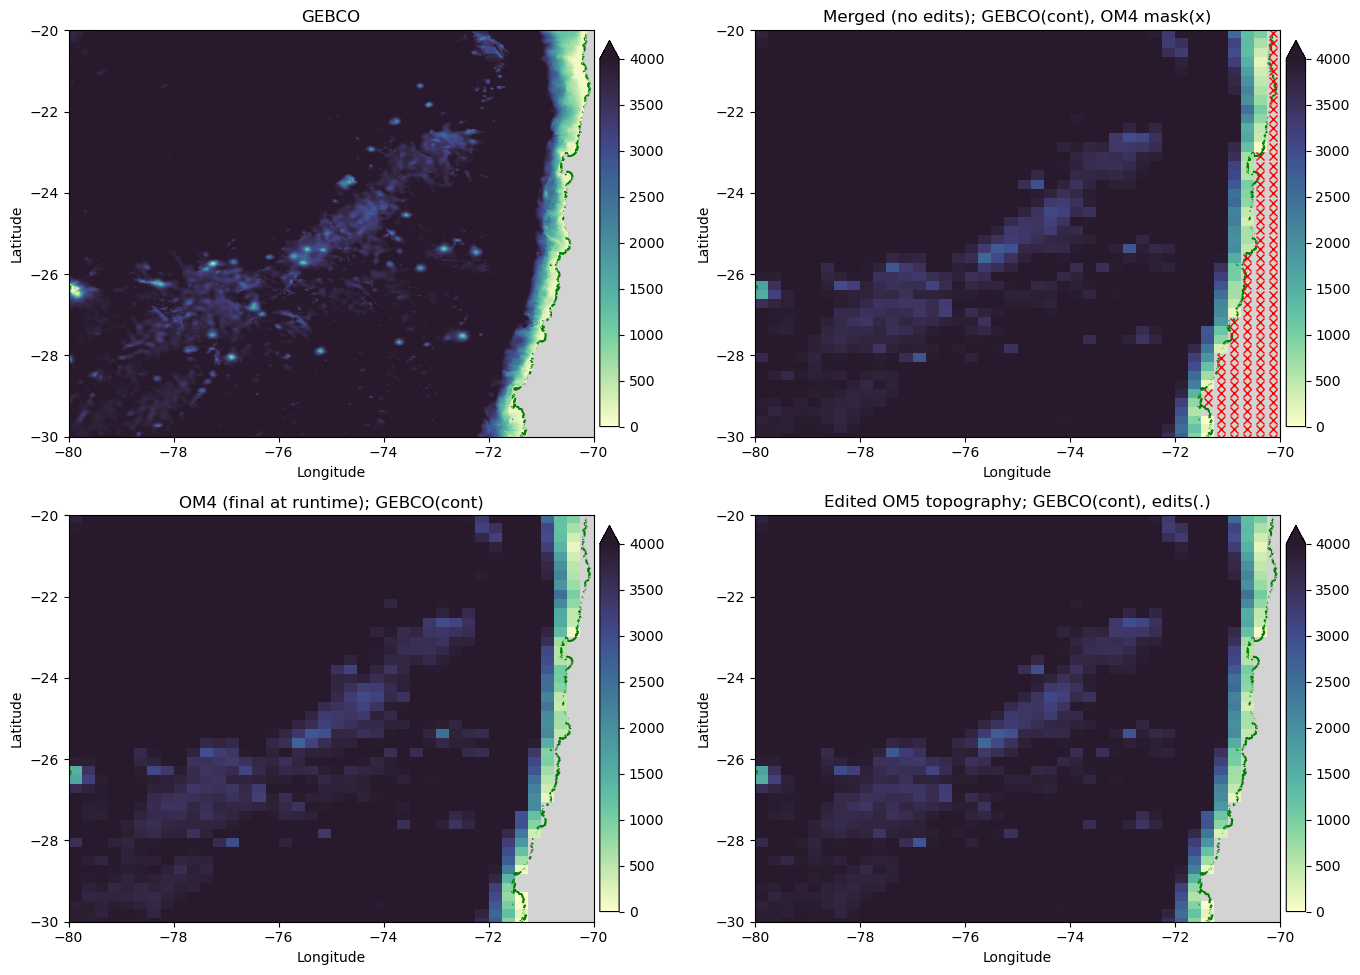

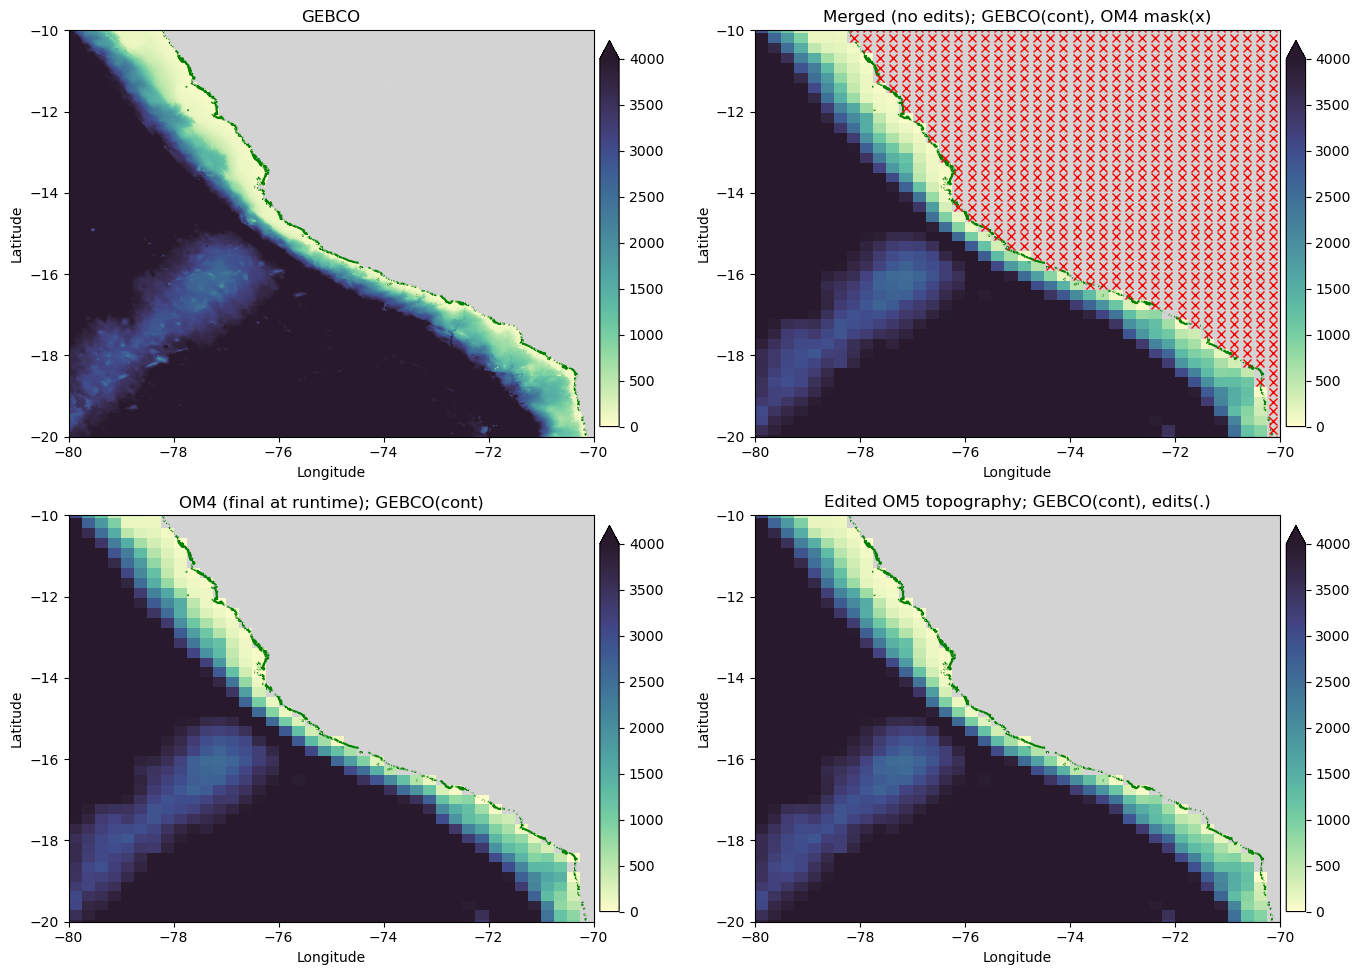

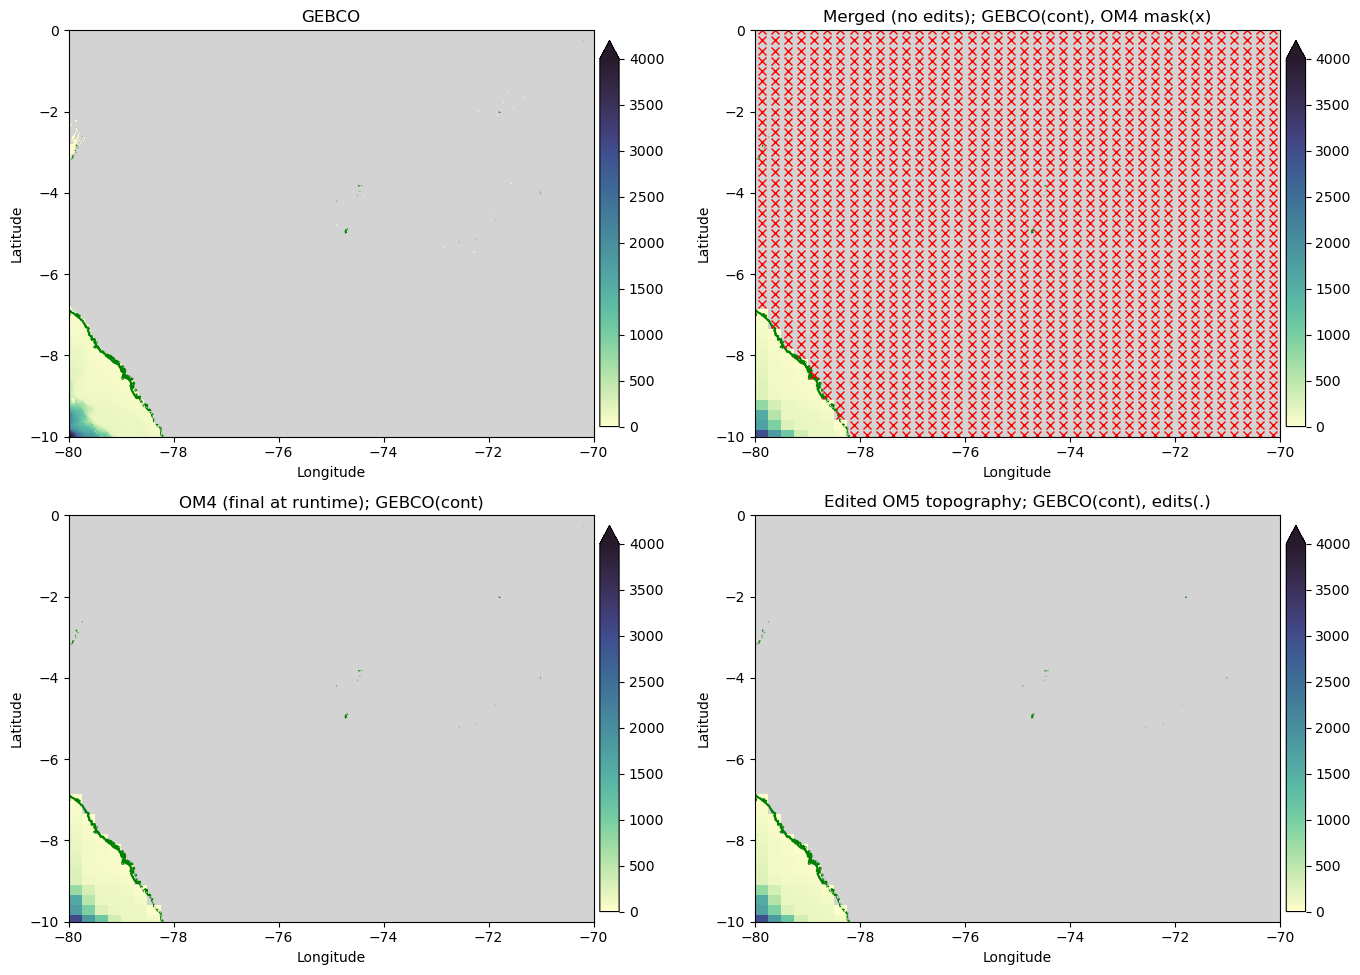

In [12]:
region = Region(-75, -25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-75, -15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-75, -5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 14399:16799,55199:57599
OM4 model (js:je,is:ie) = 376:422,918:960
OM5 model (js:je,is:ie) = 457:503,918:960
Using xlim = (-70.0, -60.0) ylim = (-30.0, -20.0)
Gebco (js:je,is:ie) = 16799:19199,55199:57599
OM4 model (js:je,is:ie) = 420:464,918:960
OM5 model (js:je,is:ie) = 501:545,918:960
Using xlim = (-70.0, -60.0) ylim = (-20.0, -10.0)
Gebco (js:je,is:ie) = 19199:21599,55199:57599
OM4 model (js:je,is:ie) = 462:504,918:960
OM5 model (js:je,is:ie) = 543:585,918:960
Using xlim = (-70.0, -60.0) ylim = (-10.0, 0.0)


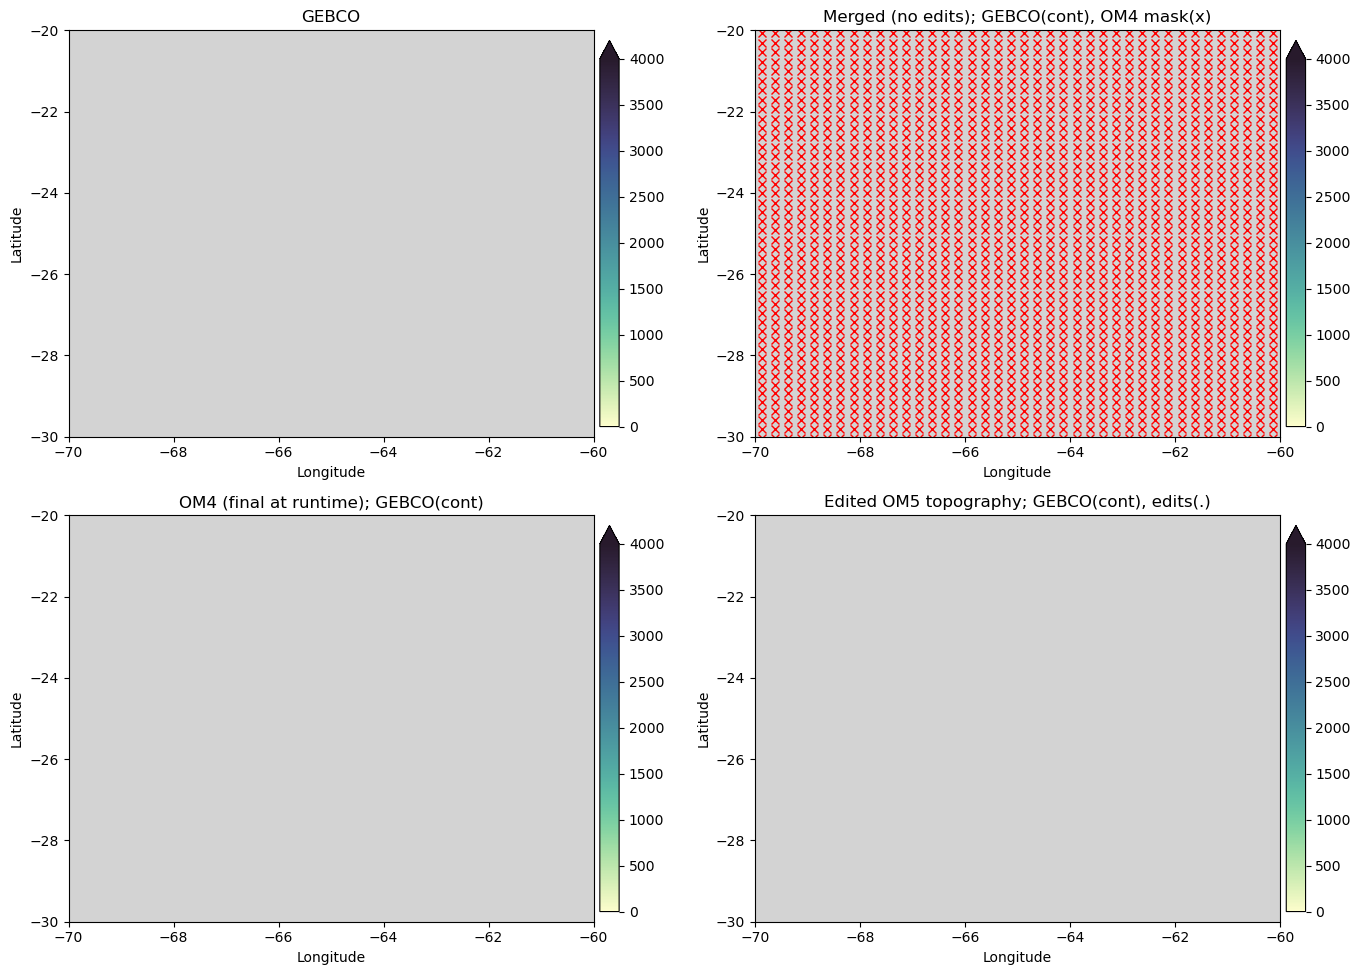

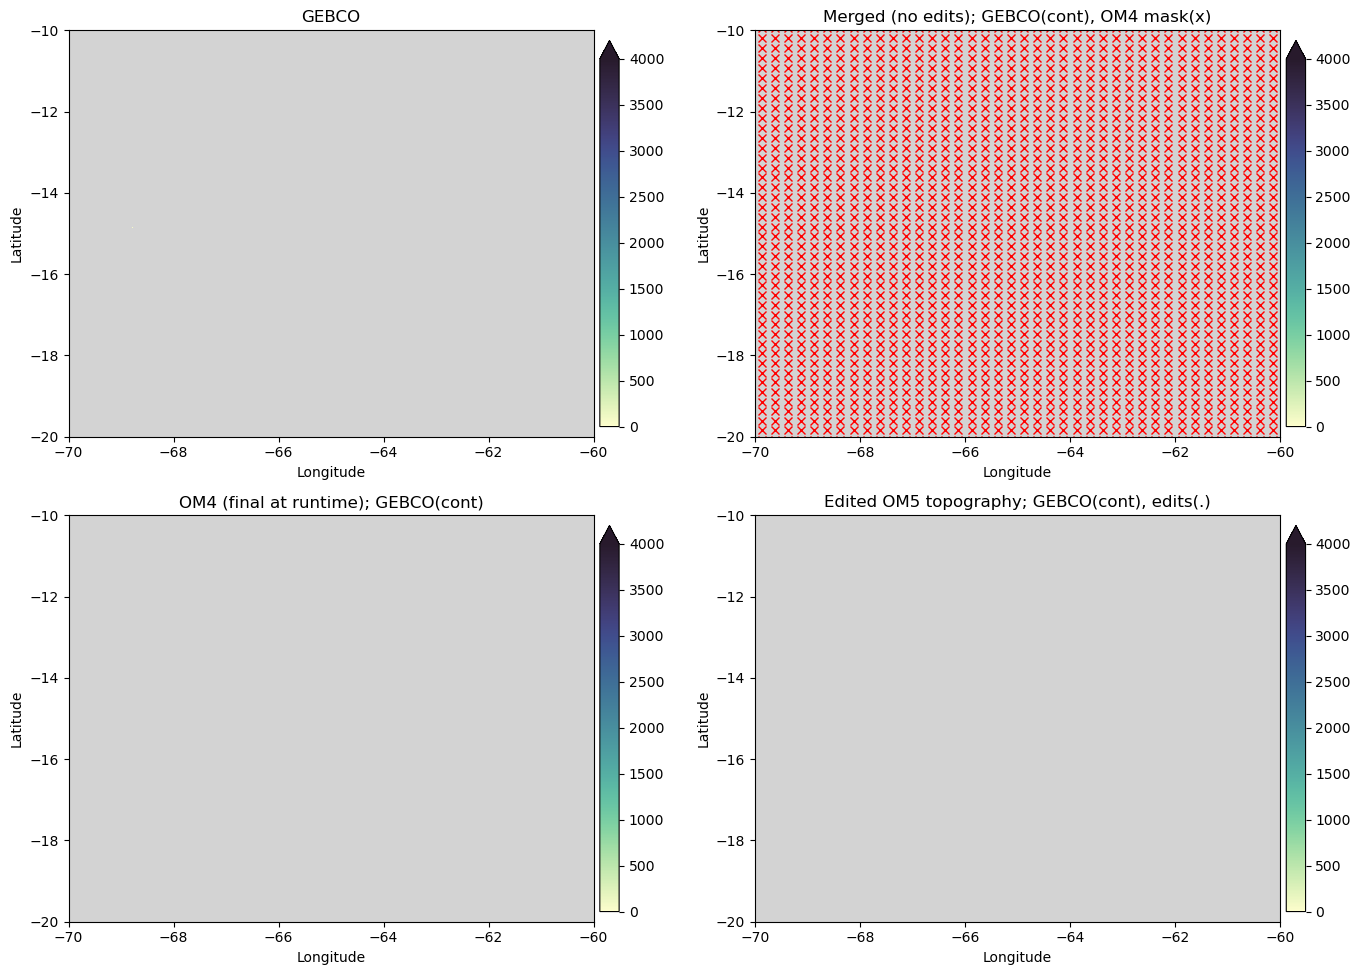

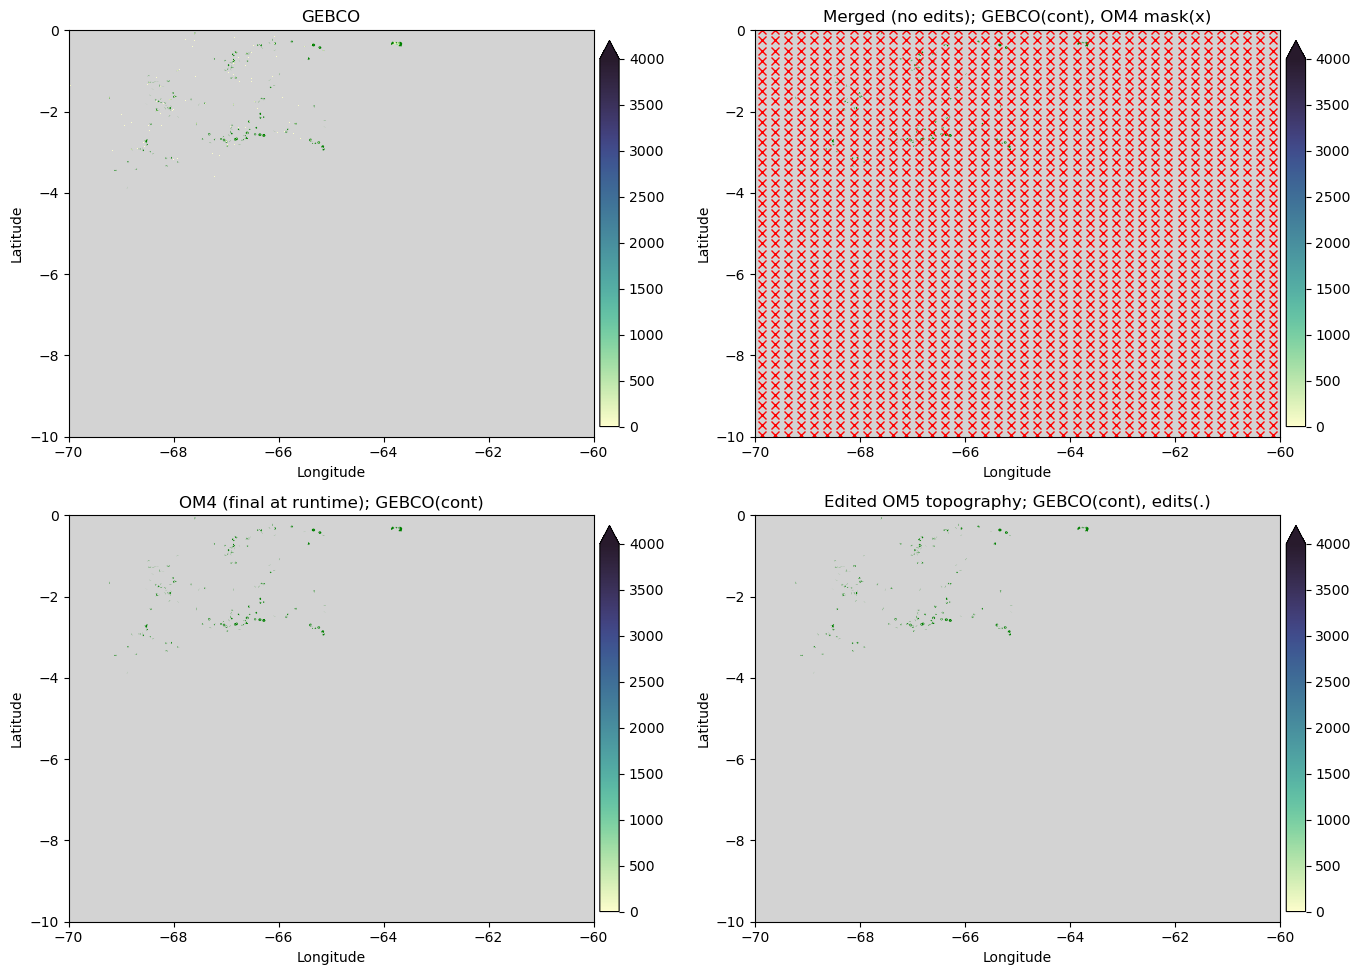

In [13]:
region = Region(-65, -25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-65, -15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(-65, -5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


In [14]:
OM5.write_nc("om5_topo_edits_region_10.nc")

New Depth at jEdit=579 iEdit=838 set to 0.0
New Depth at jEdit=580 iEdit=835 set to 0.0
New Depth at jEdit=581 iEdit=834 set to 0.0
New Depth at jEdit=581 iEdit=842 set to 0.0
New Depth at jEdit=582 iEdit=838 set to 300.0
New Depth at jEdit=583 iEdit=834 set to 0.0
New Depth at jEdit=583 iEdit=835 set to 0.0
New Depth at jEdit=583 iEdit=837 set to 0.0
New Depth at jEdit=585 iEdit=838 set to 0.0
NetCDF file 'om5_topo_edits_region_10.nc' written successfully.
